[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/osllmai/indoxGen/blob/master/examples/gan_tensorflow.ipynb)

In [1]:
from indoxGen_tensor import TabularGANConfig,TabularGANTrainer

In [2]:
import pandas as pd
data = pd.read_csv("data/Adult.csv")

In [3]:
data.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,4,226802,1,4,7,3,2,1,0,0,40,39,0
1,38,4,89814,11,2,5,0,4,1,0,0,50,39,0
2,28,2,336951,7,2,11,0,4,1,0,0,40,39,1
3,44,4,160323,15,2,7,0,2,1,7688,0,40,39,1
4,18,0,103497,15,4,0,3,4,0,0,0,30,39,0


In [4]:
# Define categorical, mixed, and integer columns
categorical_columns = ["workclass", "education", "marital-status", "occupation",
                       "relationship", "race", "gender", "native-country", "income"]
mixed_columns = {"capital-gain": "positive", "capital-loss": "positive"}
integer_columns = ["age", "fnlwgt", "hours-per-week", "capital-gain", "capital-loss"]

In [5]:
# Set up the configuration
config = TabularGANConfig(
    input_dim=200,  # Noise dimension
    generator_layers=[128, 256, 512],
    discriminator_layers=[512, 256, 128],
    learning_rate=2e-4,
    beta_1=0.5,
    beta_2=0.9,
    batch_size=128,
    epochs=50,
    n_critic=5
)

# Initialize the trainer with the config and column information
trainer = TabularGANTrainer(
    config=config,
    categorical_columns=categorical_columns,
    mixed_columns=mixed_columns,
    integer_columns=integer_columns
)

# Train the model
history = trainer.train(data, patience=15)


Epoch 1/50
382/382 ━━━━━━━━━━━━━━━━━━━━ 51s 52ms/step - d_loss: 1.6731 - g_loss: -0.2489 - learning_rate: 0.0010
Epoch 2/50
382/382 ━━━━━━━━━━━━━━━━━━━━ 28s 74ms/step - d_loss: -2.0078 - g_loss: 1.0284 - learning_rate: 0.0010
Epoch 3/50
382/382 ━━━━━━━━━━━━━━━━━━━━ 21s 54ms/step - d_loss: -1.1621 - g_loss: 0.7658 - learning_rate: 0.0010
Epoch 4/50
382/382 ━━━━━━━━━━━━━━━━━━━━ 22s 56ms/step - d_loss: -0.5900 - g_loss: 0.7240 - learning_rate: 0.0010
Epoch 5/50
382/382 ━━━━━━━━━━━━━━━━━━━━ 27s 70ms/step - d_loss: -0.5767 - g_loss: 1.2415 - learning_rate: 0.0010
Epoch 6/50
382/382 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - d_loss: -0.6405 - g_loss: 1.7828
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
382/382 ━━━━━━━━━━━━━━━━━━━━ 29s 76ms/step - d_loss: -0.6411 - g_loss: 1.7838 - learning_rate: 0.0010
Epoch 7/50
382/382 ━━━━━━━━━━━━━━━━━━━━ 28s 74ms/step - d_loss: -0.7019 - g_loss: 2.3591 - learning_rate: 5.0000e-04
Epoch 8/50
382/382 ━━━━━━━━━━━━━━━━━━━━ 27s 71ms/ste

In [6]:
# generate synthetic data
synthetic_data = trainer.generate_samples(50000)

In [7]:
synthetic_data.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,50,4,111759,11,2,3,0,4,1,0,0,42,39,0
1,41,4,84944,15,2,10,0,4,0,0,0,44,39,1
2,52,6,94760,9,2,4,0,4,1,2525,0,40,39,0
3,40,4,96768,11,4,3,1,4,1,124,9,43,39,0
4,51,4,295161,9,2,4,0,4,1,0,0,52,39,1


In [8]:
data.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,4,226802,1,4,7,3,2,1,0,0,40,39,0
1,38,4,89814,11,2,5,0,4,1,0,0,50,39,0
2,28,2,336951,7,2,11,0,4,1,0,0,40,39,1
3,44,4,160323,15,2,7,0,2,1,7688,0,40,39,1
4,18,0,103497,15,4,0,3,4,0,0,0,30,39,0


In [9]:
data.describe()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
count,48842.000000,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,3.870439,1.896641e+05,10.288420,2.618750,6.577700,1.443287,3.668052,0.668482,1079.067626,87.502314,40.422382,36.749355,0.239282
std,13.710510,1.464234,1.056040e+05,3.874492,1.507703,4.230509,1.602151,0.845986,0.470764,7452.019058,403.004552,12.391444,7.775343,0.426649
min,17.000000,0.000000,1.228500e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,4.000000,1.175505e+05,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,39.000000,0.000000
50%,37.000000,4.000000,1.781445e+05,11.000000,2.000000,7.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,39.000000,0.000000
75%,48.000000,4.000000,2.376420e+05,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,39.000000,0.000000
max,90.000000,8.000000,1.490400e+06,15.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000,1.000000


In [10]:
synthetic_data.describe()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,37.761720,4.110500,182419.035020,12.387460,2.40948,3.02324,1.170160,3.846160,0.674760,850.661760,49.271380,39.830940,38.347520,0.242360
std,11.282167,1.149242,80453.122817,2.470518,1.35143,1.91161,1.434115,0.533834,0.468469,1910.936133,114.720454,8.661599,4.100557,0.428515
min,25.000000,0.000000,84061.000000,1.000000,0.00000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,28.000000,0.000000,0.000000
25%,25.000000,4.000000,100616.750000,11.000000,2.00000,1.00000,0.000000,4.000000,0.000000,0.000000,0.000000,31.000000,39.000000,0.000000
50%,36.000000,4.000000,168245.500000,11.000000,2.00000,3.00000,1.000000,4.000000,1.000000,159.000000,11.000000,39.000000,39.000000,0.000000
75%,51.000000,4.000000,270943.750000,15.000000,4.00000,3.00000,3.000000,4.000000,1.000000,499.000000,25.000000,48.000000,39.000000,0.000000
max,52.000000,7.000000,295267.000000,15.000000,6.00000,14.00000,5.000000,4.000000,1.000000,8531.000000,491.000000,53.000000,39.000000,1.000000


In [11]:
history = trainer.get_training_history()

E:\Codes\IndoxGen\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
E:\Codes\IndoxGen\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



Utility Metrics Comparison (Real vs. Synthetic):

Classifier: LOGISTICREGRESSION
Accuracy: Real = 80.45, Synthetic = 51.56, Difference = 28.89
AUC: Real = 0.82, Synthetic = 0.52, Difference = 0.29
F1 Score: Real = 0.65, Synthetic = 0.48, Difference = 0.17

Classifier: DECISIONTREE
Accuracy: Real = 81.29, Synthetic = 49.68, Difference = 31.61
AUC: Real = 0.75, Synthetic = 0.58, Difference = 0.17
F1 Score: Real = 0.75, Synthetic = 0.49, Difference = 0.26

Classifier: RANDOMFOREST
Accuracy: Real = 86.24, Synthetic = 61.44, Difference = 24.80
AUC: Real = 0.91, Synthetic = 0.74, Difference = 0.17
F1 Score: Real = 0.80, Synthetic = 0.59, Difference = 0.21

Classifier: MULTILAYERPERCEPTRON
Accuracy: Real = 83.86, Synthetic = 55.43, Difference = 28.43
AUC: Real = 0.89, Synthetic = 0.61, Difference = 0.29
F1 Score: Real = 0.76, Synthetic = 0.53, Difference = 0.23

Statistical Similarity Metrics:
Average Wasserstein Distance (Continuous Columns): 0.0316
Average Jensen-Shannon Divergence (Catego

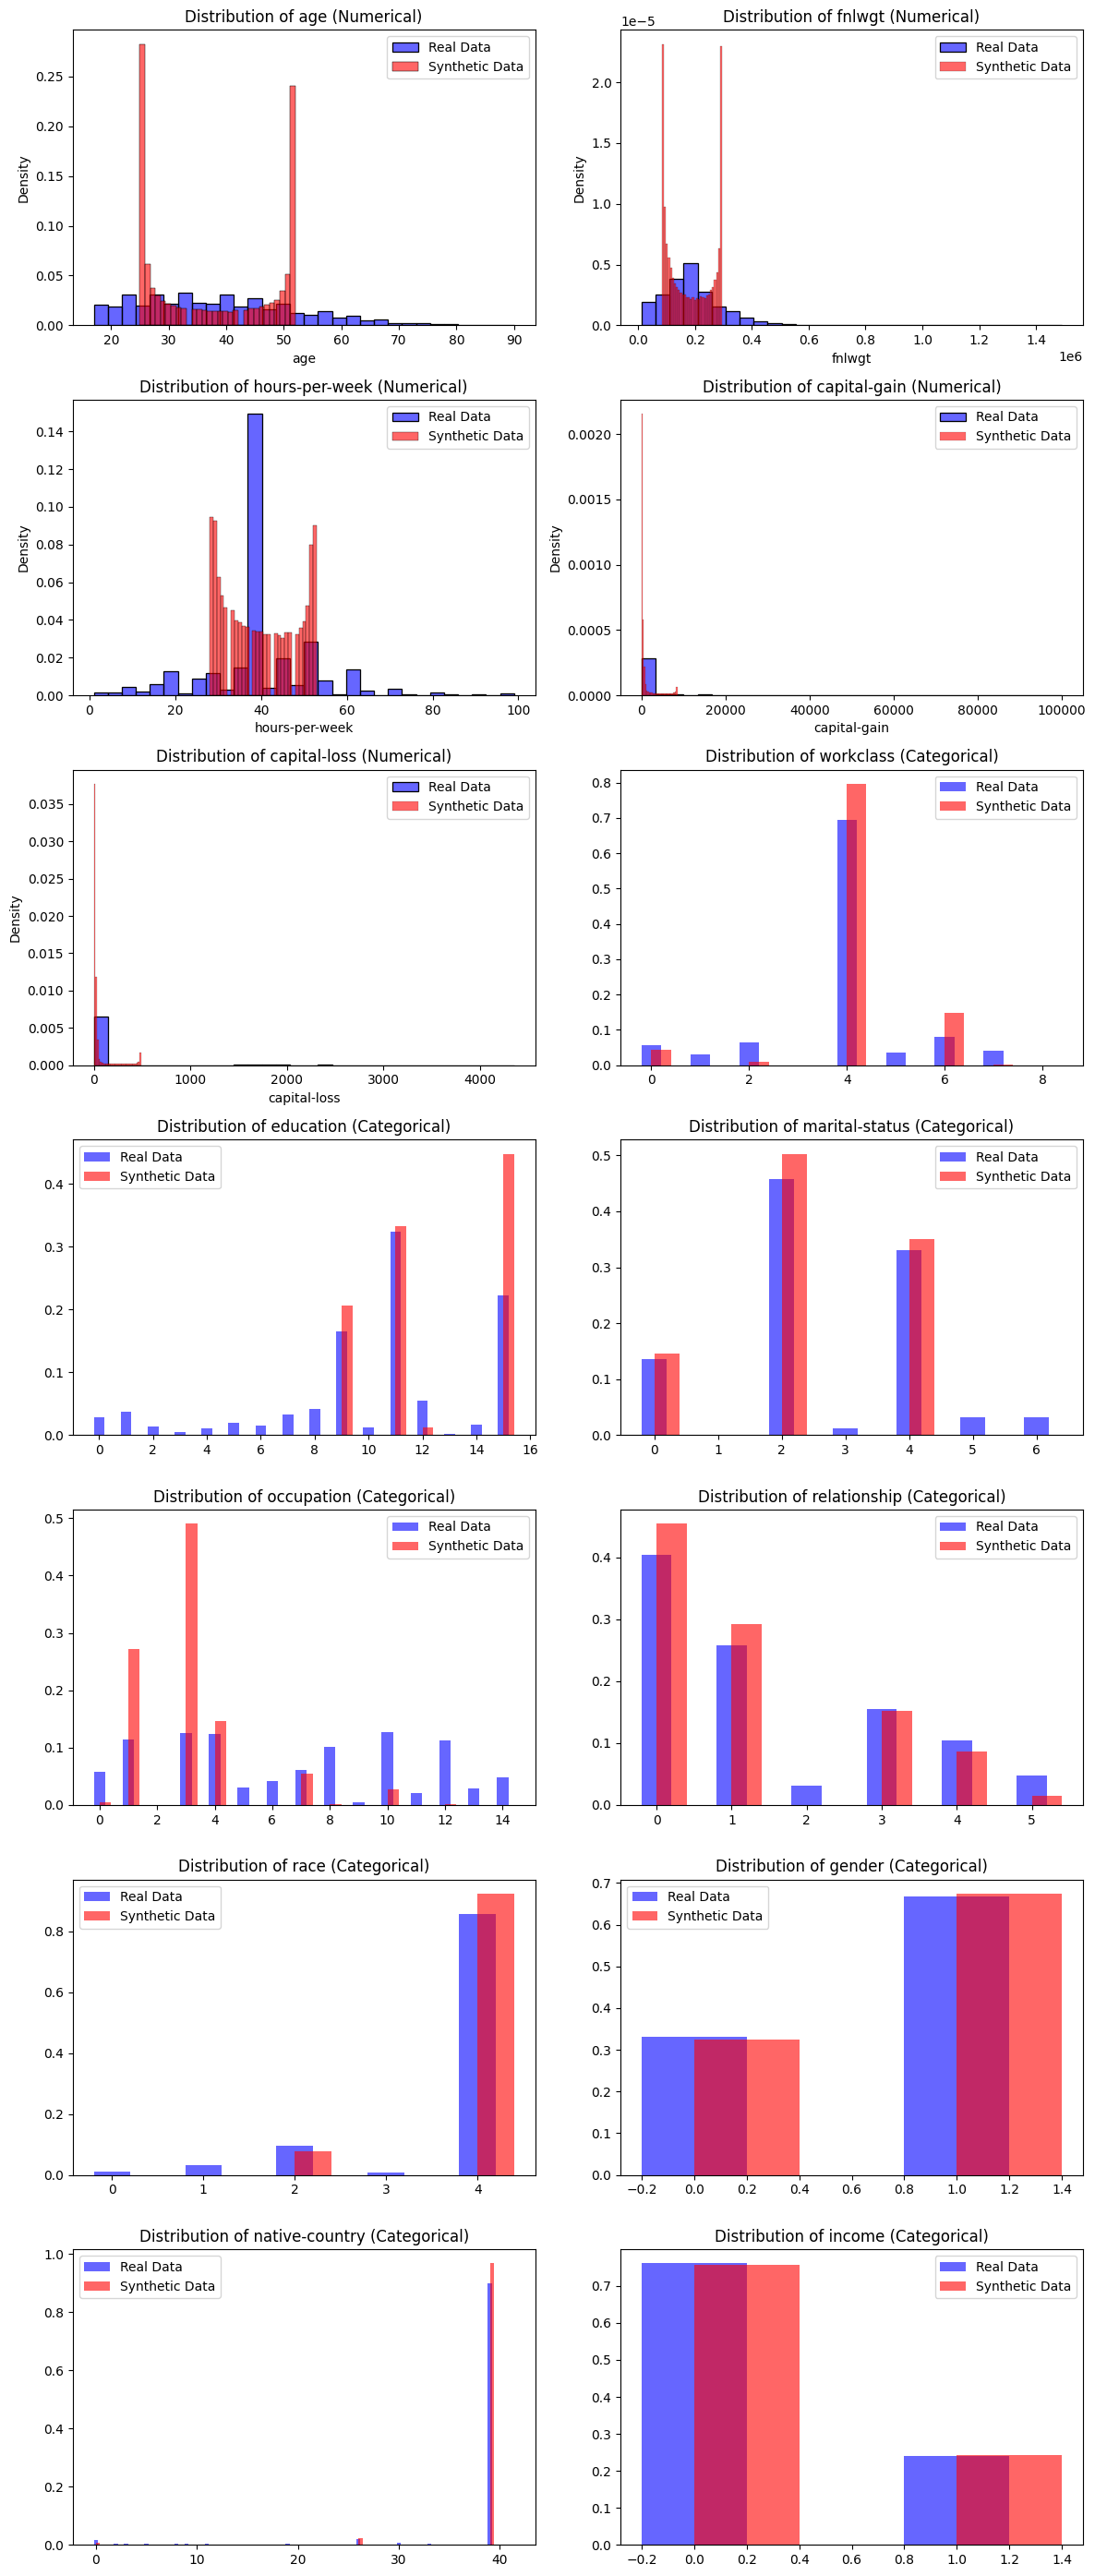

In [14]:
from indoxGen_tensor import  evaluate_utility, evaluate_statistical_similarity, evaluate_privacy, evaluate_data_drift, plot_distributions
# 1. Evaluate Utility
evaluate_utility(data, synthetic_data, classifiers=["LogisticRegression", "DecisionTree", "RandomForest", "MultiLayerPerceptron"])

# 2. Evaluate Statistical Similarity
evaluate_statistical_similarity(data, synthetic_data, cat_cols=categorical_columns)

# 3. Evaluate Privacy
evaluate_privacy(data, synthetic_data)

# 4. Evaluate Data Drift
drift_results = evaluate_data_drift(data, synthetic_data, categorical_columns, integer_columns)
print(drift_results)

# 5. Visualize Distributions
plot_distributions(data, synthetic_data, categorical_columns, integer_columns)